# Personal Information
Name: **Marissa Faas**

StudentID: **14168472**

Email: [**14168472@student.uva.nl**](14168472@student.uva.nl)

Submitted on: **19.03.2023**

# Data Context
Real world gunshot data, recorded in the wild with wildlife background noise is currenly non-existend. Collecting this audio data would present a significant challenge of setting up microphones in wildlife reserves. This project has not been set-up (yet) since further research is needed to garantee the success of poacher detection in the wild. Therefore this thesis research is of great importance: **To what extent is it possible to achieve sufficient accuracy scores when using a compressed Convolutional Neural Network for gunshot audio detection on an edge device?** However, this entails that the data employed in this thesis will be purposefully generated.

The data is collected from the following sources:
- Youtube videos for background noise:
  - https://www.youtube.com/watch?v=OcVtCTBTJ-4 ("Nature and wildlife sounds from the African savanna")
  - https://www.youtube.com/watch?v=Bm_Gc4MXqfQ ("Lions, hyenas and other wildlife calling in the Masai Mara")
  - https://www.youtube.com/watch?v=Mr9T-943BnE ("Nature Sounds: Rain Sounds One Hour for Sleeping, Sleep Aid for Everybody")
  - https://www.youtube.com/watch?v=T9IJKwEspI8 ("RELAX OR STUDY WITH NATURE SOUNDS: Ultimate Thunderstorm / 1 hour")
- Publicly available audio dataset UrbanSound8K:
  - https://urbansounddataset.weebly.com/urbansound8k.html

This results in 4 one-hour recordings of savanna by day, savanna by night, rain, and thunder sounds. The UrbanSound8k contains gunshot audio without any background noise, the so called "signals", these will be extracted from the total dataset. All audio recordings will be combined in different ways to create an augmented dataset for the gunshot audio detection model. All background audio will be cut into snippets of 10 seconds and the gunshot signals will be elongated to 10 seconds before they are combined and augmented. 

# Data Description

**Present here the results of your exploratory data analysis. Note that there is no need to have a "story line" - it is more important that you show your understanding of the data and the methods that you will be using in your experiments (i.e. your methodology).**

**As an example, you could show data, label, or group balances, skewness, and basic characterizations of the data. Information about data frequency and distributions as well as results from reduction mechanisms such as PCA could be useful. Furthermore, indicate outliers and how/why you are taking them out of your samples, if you do so.**

**The idea is, that you conduct this analysis to a) understand the data better but b) also to verify the shapes of the distributions and whether they meet the assumptions of the methods that you will attempt to use. Finally, make good use of images, diagrams, and tables to showcase what information you have extracted from your data.**

First of all, some important information is given to get an understanding of audio data. Audio signals are electronic represenations of sounds waves, whereas sound is mechanical wave energy. Both audio and sound have four major properties: amplitude (loudness), pitch (based on the frequency), duration, and timbre (quality of the sound, based on harmonics of the frequency). Also, hertz (Hz) is the SI derived unit for the frequency of sound waves, where 1 hertz equal 1 cycle per second. 

Performing in-depth analysis of audio signals requires the extraction of important features of the audio signals (feature extraction). The most important features are: 
- time domain
- frequency domain
- time-frequency domain

In [3]:
# Imports
import os
import numpy as np
import pandas as pd
import nbconvert # for pdf export

# Imports for signal time and frequency plot
import librosa
import librosa.display
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import math

### Data Loading

In [4]:
# Load data for Analysis 1: 
def loadSampleTime(filepath, sample_rate):
    """Input: filepath is path to .wav file.
    Returns: np.ndarray time series of the audio signal"""

    # Use librosa to load the audio file
    time_s, sample_r = librosa.load(filepath, sr=sample_rate, dtype='float32', mono=True)  
  
    return time_s


### Analysis 1: Time Domain
In time domain, the signal can be presented with a one dimensional vector of amplitudes in time units (µs, ms or second). A clean time domain represenation of a pure tone of 441 Hz looks like a sinusoid (figure 1), whereas a signals can also contain multiple frequencies (figure 2). Below three time domain representations of an audio signals of 10 second fragments are plotted, respectively rain, thunder and gunshot signals. 

![Figure 1](https://elvers.us/perception/soundWave/441pure.jpg)
![Figure 2](https://elvers.us/perception/soundWave/441.jpg)

Plotting signal 'C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/Data/SplitFiles/rain/0.wav'


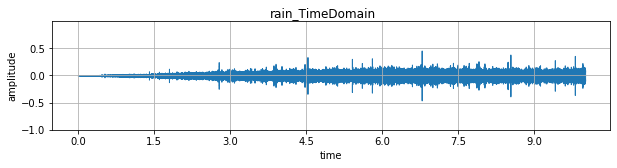

Plotting signal 'C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/Data/SplitFiles/thunder/0.wav'


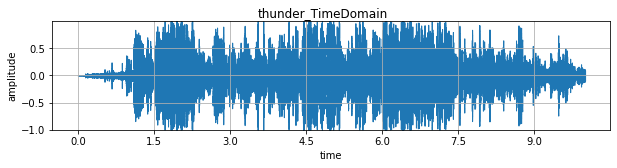

Plotting signal 'C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/Data/SplitFiles/single_shots/0.wav'


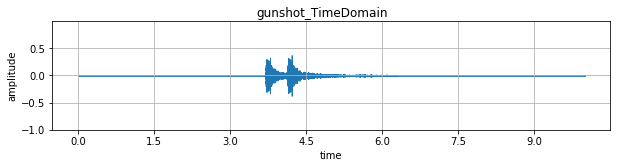

In [15]:

def plotDatasets(signal, name):

    # Determine title and filename
    filename = os.path.join(exportPath,
        "{name}.png".format(name=name)).replace(os.sep, '/')

    # Create axis tick formatter
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10,2))
    
    plt.suptitle(name)
    plt.grid()
    
    librosa.display.waveshow(signal, sr=sample_rate)
    
    # plt.xlim(left=0, right=1) #
    plt.yticks(np.arange(-1, 1, 0.5))
    plt.ylim(-1,1)

    plt.xlabel("time")
    plt.ylabel("amplitude")

    # Set x axis formatter
    ax.xaxis.set_major_formatter(formatter)

    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.show()

# Sample rate
sample_rate = 48000
# Export path
exportPath = "C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/EDA/EDA_Plots"

# Rain example
datasetPath = "C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/Data/SplitFiles/rain/0.wav"
print("Plotting signal '{path}'".format(path=datasetPath))
signal = loadSampleTime(datasetPath, sample_rate)  # Load signal
plotDatasets(signal, 'rain_TimeDomain')  # Plot signal

# Thunder example
datasetPath = "C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/Data/SplitFiles/thunder/0.wav"
print("Plotting signal '{path}'".format(path=datasetPath))
signal = loadSampleTime(datasetPath, sample_rate)  # Load signal
plotDatasets(signal, 'thunder_TimeDomain')  # Plot signal

# Gunshot example
datasetPath = "C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/Data/SplitFiles/single_shots/0.wav"
print("Plotting signal '{path}'".format(path=datasetPath))
signal = loadSampleTime(datasetPath, sample_rate)  # Load signal
plotDatasets(signal, 'gunshot_TimeDomain')  # Plot signal


### Analysis 2: Frequency domain
As explained earlier any audio signal can be decomposed into pultiple signals with different frequencies. To extract these underlying frequencies recordings need to be transformed to their frequency domain represenatation. This conversion is done using a Fast Fourier Transformation (FFT), for digital signals this is a Discrete Fourier Transofmration (DFT). Frequency domain presentations of an audio signals show the magnitude (y axis) of the frequencies (x axis) within the audio signal, as can be seen in figure 3. 

![Figure 3](https://elvers.us/perception/soundWave/fourieranalysis.jpg)

Below three average frequency domain representations of all audio signals of 10 seconds are plotted, respectively of all rain-, thunder- and gunshot signals. For the gunshot signals a different code is used.

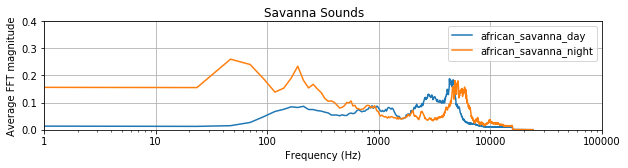

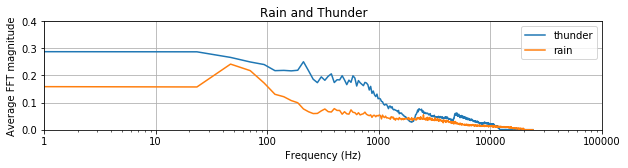

In [33]:
# Paths
datasetPath = "C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/Data/SplitFiles/"
exportPath = "C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/EDA/EDA_Plots"

# Signal settings
targetSampleRate = 48000
duration = 10
targetSampleLength = int(targetSampleRate * duration)

# FFT settings
fftSize = 2048

# Plot settings
exportDPI = 300 
maxFrequency = (targetSampleRate/2)+1

# Calculations
frequencyStep = targetSampleRate/fftSize
fftOutputSize = math.ceil(maxFrequency/frequencyStep)


def loadSample(filename):
    # Use librosa to load the audio file
    s, fs = librosa.load(filename, sr=targetSampleRate, 
            dtype='float32', mono=True)
        
    #Convert to the right size
    sizeDiff = len(s) - targetSampleLength
    if sizeDiff > 0:
        s = s[:targetSampleLength]
    elif sizeDiff < 0:
        s = np.append(s, np.zeros(shape=-sizeDiff))
   
    # Normalize the amplitude of the sample
    return np.interp(s, (min(s), max(s)), (-1,1))

def loadDataset(path):
    # Get all files in the path ending with .wav
    files = [x for x in os.listdir(path) if x.endswith(".wav")]
    
    # Create placeholder matrix 
    signals = np.zeros(
        shape=(len(files), targetSampleLength), 
        dtype=np.float32)
    
    # Load all signals
    for i, f in enumerate(files):
        signals[i] = loadSample(os.path.join(path, f))
    
    return signals

def calculateMeanFFT(signals):
    # Create placeholder matrix
    ffts = np.zeros(
        shape=(len(signals), fftOutputSize),
        dtype=np.float32)

    # Calculate FFT for every signal 
    for i,s in enumerate(signals):
        # Calculate the abstract power values
        y = np.abs(np.fft.fft(s, n=fftSize)[:fftOutputSize])

        # Normalize the power values of the fft calculation
        ffts[i] = np.interp(y, (min(y), max(y)), (0,1))

    return np.mean(ffts, axis=0)


def getFrequencyStatistics(path):
    # Load all signals
    #print("Loading all signals in '{path}'".format(path=path))
    signals = loadDataset(path)
    
    # Calculate the mean FFT
    #print("Calculating FFT for all singals in '{path}'".format(path=path))
    meanFFT = calculateMeanFFT(signals)
    
    return meanFFT

def plotDatasets(datasets, title, name):
    # Get the mean FFT for each dataset
    ffts = [getFrequencyStatistics(datasetPath + x) for x in datasets]
    
    # Create the x axis
    x = np.arange(0, maxFrequency, frequencyStep)

    # Determine title and filename
    filename = os.path.join(exportPath,
        "{name}.png".format(name=name))

    # Create axis tick formatter
    formatter = ScalarFormatter()
    formatter.set_scientific(False)

    # Create figure
    fig, ax = plt.subplots(figsize=(10,2))
    plt.suptitle(title)
    plt.grid()
    
    # Set axis scale and ranges
    plt.xscale("log")
    plt.xlim(left=1, right=1e5)
    plt.yticks(np.arange(0, 0.6, 0.1))
    plt.ylim(0, 0.4)
    
    # Set axis labels
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Average FFT magnitude")
    
    # Plot average frequencies for all datasets
    for i, fft in enumerate(ffts):
        plt.plot(x, fft, label=datasets[i])
    
    # Set x axis formatter
    ax.xaxis.set_major_formatter(formatter)
    
    # Show the legend
    plt.legend(loc='upper right')
    plt.show()

    # Store the figure to a file
    fig.savefig(filename, dpi=exportDPI, bbox_inches='tight')
    plt.close(fig)


# Define the datasets to analyze
bgDatasets = ["african_savanna_day", "african_savanna_night"]
weather = ["thunder", "rain"]
gunshots = ["single_shots"]

# Plot the datasets
plotDatasets(bgDatasets, "Savanna Sounds", "savanna_sounds_FrequencyDomain")
plotDatasets(weather, "Rain and Thunder", "rain_and_thunder_FrequencyDomain")
#plotDatasets(gunshots, "gunshot sound datasets", "gunshots_FrequencyDomain")

# Plot the gunshots

The nighttime african savanna sounds have more low-frequency components compared to daytime. Both thunder and rain have low-frequency components, 0 − 100Hz. Thunder soundtracks also contain components in the 100 − 1000Hz frequency range.


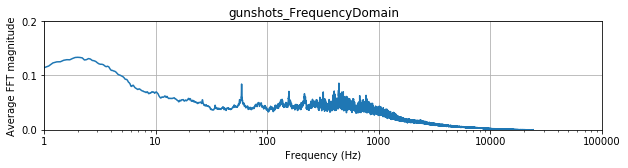

In [6]:
# Paths
datasetPath = "C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/Data/gunshots"
exportPath = "C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/EDA/EDA_Plots"

# Signal settings
duration = 10
sample_rate = 48000

def loadSample(filename):
    # Use librosa to load the audio file
    s, fs = librosa.load(filename, sr=sample_rate, 
            dtype='float32', mono=True)

    # Convert to the right size
    sizeDiff = len(s) - sample_rate*duration
    if sizeDiff > 0:
        s = s[:sample_rate*duration]
    elif sizeDiff < 0:
        s = np.append(s, np.zeros(shape=-sizeDiff))
    
    return np.interp(s, (min(s), max(s)), (-1,1))

def loadDataset(path):
    # Get all files in the path ending with .wav
    files = [x for x in os.listdir(path) if x.endswith(".wav")]
    
    # Create placeholder matrix 
    signals = np.zeros(
        shape=(len(files), sample_rate*duration), 
        dtype=np.float32)
    
    # Load all signals
    for i, f in enumerate(files):
        signals[i] = loadSample(os.path.join(path, f))
    
    return signals

def getFrequencyStatistics(path):
    # Load all signals
    #print("Loading all signals in '{path}'".format(path=path))
    signals = loadDataset(path)
    
    return calculateMeanFFT(signals)

def calculateMeanFFT(signals):
    ffts=[]
    tpCount     = sample_rate*duration
    values      = np.arange(int(tpCount/2))
    timePeriod  = tpCount/sample_rate
    frequencies = values/timePeriod

    # Calculate FFT for every signal 
    for i,s in enumerate(signals):

        # Frequency domain representation
        fourierTransform = np.fft.fft(s)/len(s)           # Normalize amplitude
        y = abs(fourierTransform[range(int(len(s)/2))]) # Exclude sampling frequency

        ffts.append(np.interp(y, (min(y), max(y)), (0,1)))

    meanFFTs = np.mean(ffts, axis=0)
    meanFFTs = np.interp(meanFFTs, (min(meanFFTs), max(meanFFTs)), (0,1))
    return frequencies, meanFFTs

def plotDatasets(frequencies, meanFFTs, name):

    # Determine title and filename
    filename = os.path.join(exportPath,
        "{name}.png".format(name=name))

    # Create axis tick formatter
    formatter = ScalarFormatter()
    formatter.set_scientific(False)
    
    # Create plot
    fig, ax = plt.subplots(figsize=(10,2))
    
    # plt.suptitle('Birdcalls')
    plt.suptitle(name)
    plt.grid()
    
    plt.plot(frequencies, meanFFTs) 

    plt.xscale('log')
    plt.xlim(left=1,right=1e5)
    plt.yticks(np.arange(0, 1, 0.1))
    plt.ylim(0, 0.2)

    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Average FFT magnitude")

    # Set x axis formatter
    ax.xaxis.set_major_formatter(formatter)

    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    plt.show()


frequencies, meanFFTs = getFrequencyStatistics(datasetPath)
plotDatasets(frequencies, meanFFTs, 'gunshots_FrequencyDomain')

Pay attention to the y-axis that have changed (maximum is no 0.2 instead of 0.4 in privious plots). FFT magnitude of gunshot sounds is lower on average than other categories. One might expect larger magnitudes for higher frequencies due to the shockwave presence in the gunshot sound. However, it is worth reminding that the presence of a shockwave and its magnitude in gunshot signal depends on the distance and angle between the bullet trajectory and the acoustic sensor. Moreover, acoustic sensor characteristics have a non-negligible influence on the reproduced frequencies. 

### Analysis 3: Time-frequency domain
These features combine both the time and frequency components of the audio signal. The time-frequency representation is obtained by applying the ShortTime Fourier Transform (STFT) on the time domain waveform. STFT reveals the frequencies that appear at different moments in time, some examples of representations in this feature domain are: 

- Spectrogram: This signal representation allows one to examine the power level difference at different frequencies and how these levels fluctuate over time for each chosen frequency.
- Mel-spectrogram: A spectrogram where the frequencies are converted to the Mel scale. Humans do not perceive frequencies on a linear scale. They are better at detecting differences in lower frequencies than higher frequencies. The Mel scale maps frequencies to equally spaced pitches or Mels. Mel-spectrograms are better suited for audio classification applications and applications that need to model human hearing perception.
- Mel Frequency Cepstral Coefficients (MFCC): Coefficients that collectively make up an MFC (mel-frequency cepstrum). A cepstrum is a spectrum of the log of the spectrum of the time signal. Mel-frequency cepstrum utilizes the Mel scale for frequency band spacing which approximates the response of the human auditory system.

Most of the related works presented in this study use MFCCs for acoustic feature representation of the gunshot audio, showing acceptable results. Additionally, MFCCs yield lower computation time since the number of parameters for training the deep learning model is lower than Mel spectrograms.


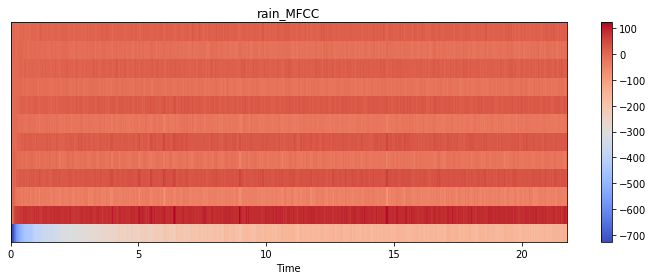

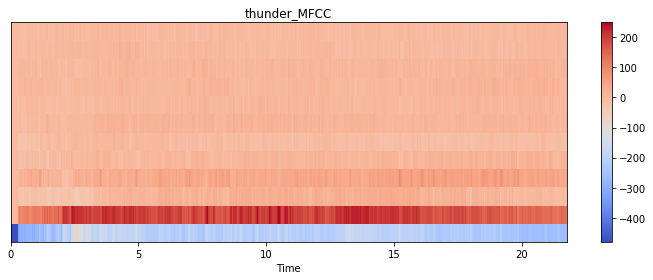

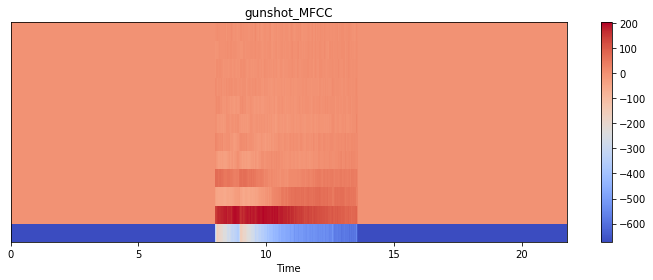

In [9]:
# Paths
exportPath = "C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/EDA/EDA_Plots"

# Signal settings
sample_rate = 48000
duration = 10

def plotMFCC(datasetPath, sample_rate, exportPath, name):

    # Determine title and filename
    filename = os.path.join(exportPath,
        "{name}.png".format(name=name))

    # Use librosa to load the audio file
    time_s, sample_r = librosa.load(datasetPath, sr=sample_rate, dtype='float32', mono=True) 
    
    # compute MFCC features
    mfccs = librosa.feature.mfcc(y=time_s, sr=sample_r, n_mfcc=13)  # returns MFCC sequence as np.ndarray

    # plot MFCC
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar()
    plt.title(name)
    plt.tight_layout()

    plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

# Plot three examples, rain, thunder, and gunshot
plotMFCC("C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/Data/SplitFiles/rain/0.wav", sample_rate, exportPath, "rain_MFCC")
plotMFCC("C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/Data/SplitFiles/thunder/0.wav", sample_rate, exportPath, "thunder_MFCC")
plotMFCC("C:/Users/maris/Documents/DataScience/Thesis/PinPoach_Thesis/Data/SplitFiles/single_shots/0.wav", sample_rate, exportPath, "gunshot_MFCC")

#### ChatGPT:

The x-axis of the MFCC plot shows the time axis of the audio signal. The length of the x-axis depends on the length of the audio signal, which in turn depends on the sample rate and the number of samples.

In your code, you are specifying the sample rate as 48000, which means that there are 48000 samples per second. If your audio file is 10 seconds long, then the number of samples in the audio signal is 48000 * 10 = 480000.

The MFCC feature extraction algorithm divides the audio signal into frames of a fixed duration, typically 20-30 milliseconds, and computes the MFCC coefficients for each frame. The number of frames in the signal is determined by the duration of the signal and the frame duration.

In your code, you are not specifying the frame duration, so librosa is using the default value of 2048 samples per frame, which corresponds to a frame duration of approximately 42.7 milliseconds. The number of frames in the signal is therefore 480000 / 2048 = 234.4, which is why the x-axis of the plot shows more than 20 time units.

To fix this, you can specify a smaller value for the hop_length parameter of the librosa.feature.mfcc() function, which determines the number of samples between the start of each frame. By
